# Predicting Loan Creditworthiness

The primary objective of this project is to develop an accurate classifier for predicting the creditworthiness of a borrower.

In the training dataset, **Loan_Status** is the binary target

## Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

In [3]:
train_data = pd.read_csv('Train.csv')

In [4]:
train_data.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [18]:
train_data.shape

(5898, 15)

In [192]:
test_data = pd.read_csv('Test.csv')

In [193]:
test_data.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [19]:
test_data.shape

(2528, 14)

In [5]:
#checking the data description
pd.options.display.max_colwidth = 100
feature_des = pd.read_excel('Variable_def.xlsx')
feature_des

,ID: Unique ID for each observation
0,Loan_ID: A unique loan ID.
1,Gender: Either male or female.
2,Married: Weather Married(yes) or Not Marttied(No).
3,Dependents: Number of persons depending on the client.
4,Education: Applicant Education(Graduate or Undergraduate).
5,Self_Employed: Self-employed (Yes/No).
6,ApplicantIncome: Applicant income.
7,CoapplicantIncome: Co-applicant income.
8,LoanAmount: Loan amount in thousands.
9,Loan_Amount_Term: Terms of the loan in months.


# Data Quality issue 1

Feature description is not given for **Total_Income**

Total income may be assumed to be the addition of **ApplicantIncome** and **CoapplicantIncome** but on further inspection...

In [9]:
train_data_income = train_data[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].copy()

In [12]:
train_data_income ['Applicant + Coapplicant Income'] = train_data_income['ApplicantIncome'] + train_data_income['CoapplicantIncome']

In [14]:
train_data_income

,ApplicantIncome,CoapplicantIncome,Total_Income,Applicant + Coapplicant Income
0,8328,0.000000,6000,8328.000000
1,150,3857.458782,6000,4007.458782
2,4989,314.472511,6000,5303.472511
3,150,0.000000,3750,150.000000
4,8059,0.000000,3750,8059.000000
...,...,...,...,...
5893,1297,3293.124489,3750,4590.124489
5894,7358,0.000000,3547,7358.000000
5895,150,0.000000,3750,150.000000
5896,2230,0.000000,3750,2230.000000


Inspecting the data shows that that is not the case.

In [21]:
train_data.CoapplicantIncome.value_counts(normalize=True)

CoapplicantIncome
0.000000        0.466090
20000.000000    0.005086
3391.175054     0.000170
557.097981      0.000170
484.404624      0.000170
                  ...   
1706.136926     0.000170
462.283710      0.000170
629.696687      0.000170
593.647556      0.000170
3293.124489     0.000170
Name: proportion, Length: 3121, dtype: float64

<Axes: >

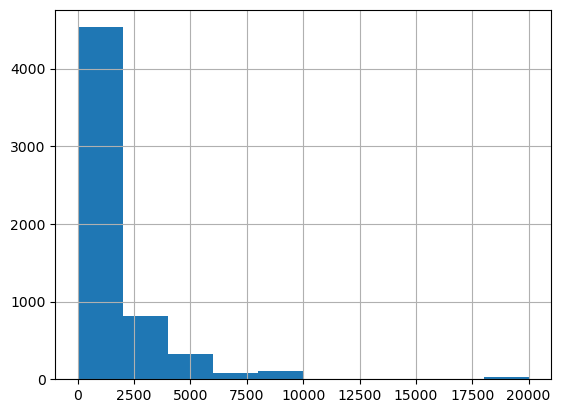

In [17]:
train_data.CoapplicantIncome.hist()

**46.609%** of the **CoapplicantIncome** feature examples are zeros. This does not seem realistic. Possibly, the coapplicant income data was missing. This feature may not be valuable for prediction given the dataset.

## Data Quality Issue #2

We are not given the time period for the income values. Are they monthly income or yearly income values? The currency used here is also unclear.

In [7]:
train_data.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


Based on the range of values, let us assume the income values represent monthly income.

In [24]:
#checking for null values
train_data.isnull().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [25]:
#checking column data types
train_data.dtypes

ID                     int64
Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
Total_Income           int64
dtype: object

In [26]:
train_data['Dependents'].unique()

array(['0', '1', '3+', '2'], dtype=object)

In [27]:
#converting the 'Dependents' column to an integer data type

mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}  
train_data['Dependents'] = train_data['Dependents'].map(mapping)

train_data['Dependents'] = train_data['Dependents'].astype(int)

In [28]:
#confirming that 'Dependents' is an int column
train_data['Dependents'].dtype

dtype('int32')

In [18]:
train_data.drop(['ID', 'Loan_ID'], axis=1).corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Gender,1.000000,-0.012686,0.012046,-0.001407,-0.010305,0.013562,0.013122,0.026877,0.007966,0.015773,-0.011594,-0.004538,0.019216
Married,-0.012686,1.000000,-0.010514,0.001686,-0.021138,0.013194,0.012071,0.003101,0.013585,0.004929,-0.002740,-0.008111,-0.018581
Dependents,0.012046,-0.010514,1.000000,0.035143,0.020438,-0.020666,0.015731,0.047651,0.010268,-0.014370,0.001803,-0.021859,-0.025854
Education,-0.001407,0.001686,0.035143,1.000000,-0.019063,0.002542,-0.012205,0.012848,-0.013553,0.004584,0.008972,-0.010613,0.013011
Self_Employed,-0.010305,-0.021138,0.020438,-0.019063,1.000000,-0.018426,-0.009861,0.018494,0.018278,0.005043,0.007627,0.005938,0.007816
ApplicantIncome,0.013562,0.013194,-0.020666,0.002542,-0.018426,1.000000,-0.001494,-0.141103,-0.042263,-0.004328,0.017171,-0.009189,-0.001889
CoapplicantIncome,0.013122,0.012071,0.015731,-0.012205,-0.009861,-0.001494,1.000000,0.021509,0.032594,-0.000494,0.034120,-0.007058,0.005806
LoanAmount,0.026877,0.003101,0.047651,0.012848,0.018494,-0.141103,0.021509,1.000000,0.052457,-0.006786,-0.006239,0.014613,-0.022152
Loan_Amount_Term,0.007966,0.013585,0.010268,-0.013553,0.018278,-0.042263,0.032594,0.052457,1.000000,0.014579,-0.007070,0.008299,-0.011980
Credit_History,0.015773,0.004929,-0.014370,0.004584,0.005043,-0.004328,-0.000494,-0.006786,0.014579,1.000000,-0.004051,0.001133,0.004930


<Axes: >

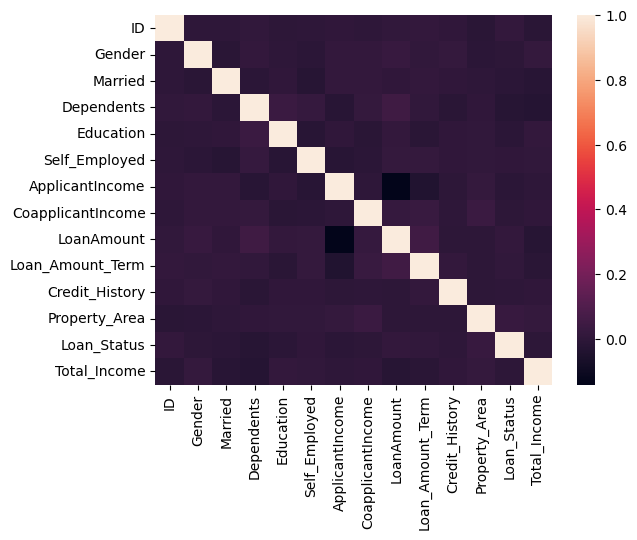

In [31]:
import seaborn as sns
#%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = train_data.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

There is very low corellation among the features and in particular, none of the features are strongly corellated with the target variable, Loan_Status.

## Building a Logistic Regression model

### Sigmoid function

In [69]:
from scipy.special import expit

def sigmoid(z):
    #sig = 1 / (1 + np.exp(-z))
    sig = expit(z)
    
    return sig

In [70]:
sigmoid(0)

0.5

In [65]:
def compute_cost(X, y, w, b, lambda_=1):
    
    cost = 0
    reg_cost = 0
    m, n = X.shape
    
    for i in range(m):
        z_wb = np.dot(w, X[i]) + b
        f_wb = sigmoid(z_wb)        
        
        loss_i = -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
        cost += loss_i
    
    cost /= m
    
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost *= (lambda_/(2*m))
    
    return cost + reg_cost

In [41]:
def compute_gradient(X, y, w, b, lambda_=1):
    
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    
    m, n = X.shape
    for i in range(m):
        z_wb = np.dot(w, X[i]) + b
        f_wb = sigmoid(z_wb)
    
        error = f_wb - y[i]
        dj_db += error
        
        for j in range(n):
            dj_dw += error*X[i, j]
            
    dj_dw[j] += lambda_ * w[j]
            
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db
    

In [59]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    
    m = X.shape[0]
    
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w_in, b_in, lambda_)
        
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db
        
        cost = cost_function(X, y, w_in, b_in, lambda_)
        J_history.append(cost)
        
        if i % round(num_iters/10) == 0 or i == (num_iters -1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
            
    return w_in, b_in, J_history

In [168]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['ID', 'Loan_ID', 'CoapplicantIncome','Total_Income', 'Loan_Status'], axis=1).to_numpy()
y = train_data['Loan_Status'].to_numpy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [170]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [171]:
np.random.seed(1)
n = X_train.shape[1]
initial_w = np.zeros(n)
initial_b = 0.

# Some gradient descent settings
iterations = 1000
alpha = 0.01

w,b, J_history = gradient_descent(X_train , y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, lambda_ = 100)

Iteration    0: Cost     0.69
Iteration  500: Cost     0.48
Iteration 1000: Cost     0.45
Iteration 1500: Cost     0.45
Iteration 2000: Cost     0.45
Iteration 2500: Cost     0.45
Iteration 3000: Cost     0.45
Iteration 3500: Cost     0.45
Iteration 4000: Cost     0.45
Iteration 4500: Cost     0.45


In [79]:
w

array([0.00265806, 0.00265806, 0.00265806, 0.00265806, 0.00265806,
       0.00265806, 0.00265806, 0.00265806, 0.00265806, 0.00265806,
       0.00261906])

In [174]:
def predict(X, w, b): 

    m, n = X.shape   
    p = np.zeros(m)
    
    f_wb = []

    for i in range(m):   
        z_wb_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_wb_i)
        
        f_wb.append(f_wb_i)

    # Apply the threshold
        if f_wb_i >= 0.5: 
            p[i] = 1
        else:
            p[i] = 0

    return p, f_wb

In [175]:
p, f_wb = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 83.637134


In [176]:
results = pd.DataFrame({"Model output": f_wb, "Prediction": p})
results

,Model output,Prediction
0,0.838415,1.0
1,0.834943,1.0
2,0.837143,1.0
3,0.832336,1.0
4,0.838692,1.0
...,...,...
4713,0.837295,1.0
4714,0.833768,1.0
4715,0.832908,1.0
4716,0.835282,1.0


In [177]:
results.describe()

,Model output,Prediction
count,4718.000000,4718.0
mean,0.836218,1.0
std,0.002395,0.0
min,0.823540,1.0
25%,0.834923,1.0
50%,0.836177,1.0
75%,0.837713,1.0
max,0.848436,1.0


(array([2.000e+00, 0.000e+00, 6.000e+00, 7.000e+00, 2.200e+01, 6.900e+01,
        1.080e+02, 3.640e+02, 4.750e+02, 1.147e+03, 9.950e+02, 7.860e+02,
        4.250e+02, 1.980e+02, 7.000e+01, 2.900e+01, 1.200e+01, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.82354023, 0.82478502, 0.82602981, 0.82727459, 0.82851938,
        0.82976417, 0.83100896, 0.83225374, 0.83349853, 0.83474332,
        0.83598811, 0.83723289, 0.83847768, 0.83972247, 0.84096726,
        0.84221204, 0.84345683, 0.84470162, 0.84594641, 0.84719119,
        0.84843598]),
 <BarContainer object of 20 artists>)

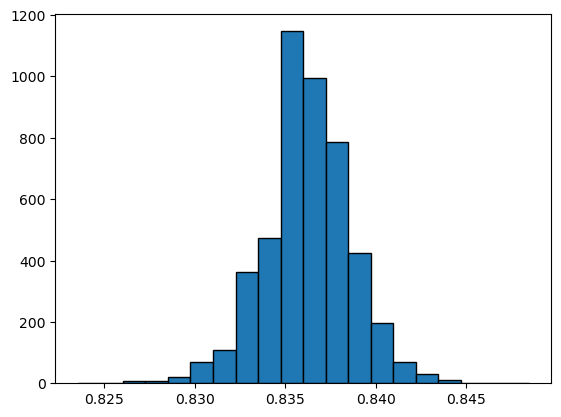

In [178]:
plt.hist(results['Model output'], edgecolor='black', bins=20)

In [179]:
p, f_wb = predict(X_valid, w,b)
print('Accuracy on validation set: %f'%(np.mean(p == y_valid) * 100))

Accuracy on validation set: 81.949153


## Making predictions on new data

In [201]:
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}  
test_data['Dependents'] = test_data['Dependents'].map(mapping)

test_data['Dependents'] = test_data['Dependents'].fillna(0).astype(int)

In [202]:
test_2 = test_data.drop(['ID', 'Loan_ID', 'CoapplicantIncome','Total_Income'], axis=1)

In [203]:
test_2 = test_2.to_numpy()

In [204]:
scaler.transform(test_2)

array([[ 0.31260177,  0.41879129, -0.66873168, ...,  0.24264242,
         0.29214075, -0.24680027],
       [ 0.31260177,  0.41879129, -0.66873168, ...,  0.28389452,
        -3.42300761, -0.24680027],
       [-3.19895816, -2.38782423, -0.66873168, ...,  0.28389452,
         0.29214075, -0.24680027],
       ...,
       [ 0.31260177,  0.41879129, -0.66873168, ..., -0.23175669,
         0.29214075,  1.12469994],
       [ 0.31260177,  0.41879129, -0.66873168, ..., -0.1905046 ,
        -3.42300761, -0.24680027],
       [-3.19895816,  0.41879129, -0.66873168, ...,  0.26326847,
         0.29214075, -0.24680027]])

In [205]:
predictions, _ = predict(test_2, w, b)

In [206]:
output = pd.DataFrame({'ID': test_data.ID, 'TARGET': predictions})
output.to_csv('submission_a.csv', index=False)